In [106]:
import pandas as pd
from numpy.random import choice
from scipy.stats import norm
import numpy as np

df = pd.read_csv("data/player_stats.csv")
df[df["yearID"] == 2020].head()
df = df[df["leagueID"] == "NL"]
df = df[["playerID", "br_WAR_total", "salary"]]
# get rows where no column has NaN
df = df.dropna()
# keep unique playerID and keep the first if duplicates are found
df = df.drop_duplicates(subset="playerID", keep="first")
df = df.sort_values(by="br_WAR_total", ascending=False).reset_index()

In [107]:
df.shape

(3100, 4)

In [108]:
#sort df by descending war_score
def sample_uniform(df, sample_size, budget):
    SAMPLE_SIZE = sample_size
    BUDGET = budget
    max_war = 0
    # set min salary to max int
    for i in range(SAMPLE_SIZE):
        sample = df.sample(n=25, replace=False)
        if sum(sample["br_WAR_total"]) > max_war and sum(sample["salary"]) <= BUDGET:
            max_war = sum(sample["br_WAR_total"])

    return max_war

In [109]:
# USING OVERSAMPLING
#sort df by descending war_score

def sample_over(df, sample_size, budget):
    SAMPLE_SIZE = sample_size
    BUDGET = budget
    max_war = 0
    # set min salary to max int
    normalized = df["br_WAR_total"] + abs(min(df["br_WAR_total"]))
    for i in range(SAMPLE_SIZE):
        sample = choice(list(range(len(df))), 25, p=normalized/sum(normalized), replace=False)

        if sum(df.iloc[sample]["br_WAR_total"]) > max_war and sum(df.iloc[sample]["salary"]) <= BUDGET:
            max_war = sum(df.iloc[sample]["br_WAR_total"])

    return max_war

In [110]:
def sample_multistage(df, sample_size, budget, frac=0.2):
    df1 = df.iloc[:int(len(df)*frac)]
    df1 = df1.sort_values(by="salary", ascending=False)
    df2 = df.iloc[:int(len(df)*frac)]
    return sample_uniform(df2, sample_size, budget)

In [111]:
def sample_multistage_oversample(df, sample_size, budget, frac=0.2):
    df1 = df.iloc[:int(len(df)*frac)]
    df1 = df1.sort_values(by="salary", ascending=False)
    df2 = df.iloc[:int(len(df)*frac)]
    return sample_over(df2, sample_size, budget)

In [113]:
BUDGET = 50000000
SAMPLE_SIZE = 1000

print("Uniform: ", sample_uniform(df, SAMPLE_SIZE, BUDGET))
print("Oversample: ",sample_over(df, SAMPLE_SIZE, BUDGET))
print("Multistage: ", sample_multistage(df, SAMPLE_SIZE, BUDGET))
print("Oversampled Multistage: ", sample_multistage_oversample(df, SAMPLE_SIZE, BUDGET))

Uniform:  47.019999999999996
Oversample:  59.25999999999999
Multistage:  95.00000000000001
Oversampled Multistage:  116.22000000000001


ValueError: probabilities are not non-negative

In [66]:
# Do it a lot of times
samples = {"Uniform": [], "Oversample": [], "Multistage": [], "Oversampled Multistage": []}

sample_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800]

means = {"Uniform": [], "Oversample": [], "Multistage": [], "Oversampled Multistage": []}

for SAMPLE_SIZE in sample_sizes:
    print("SAMPLE SIZE: ", SAMPLE_SIZE)
    BUDGET = 50000000


    for i in range(100):
        print(i+1, end=" ")
        samples["Uniform"].append(sample_uniform(df, SAMPLE_SIZE, BUDGET))
        samples["Oversample"].append(sample_over(df, SAMPLE_SIZE, BUDGET))
        samples["Multistage"].append(sample_multistage(df, SAMPLE_SIZE, BUDGET))
        samples["Oversampled Multistage"].append(sample_multistage_oversample(df, SAMPLE_SIZE, BUDGET))
    
    means["Uniform"].append(np.mean(samples["Uniform"]))
    means["Oversample"].append(np.mean(samples["Oversample"]))
    means["Multistage"].append(np.mean(samples["Multistage"]))
    means["Oversampled Multistage"].append(np.mean(samples["Oversampled Multistage"]))
    

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 

KeyboardInterrupt: 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

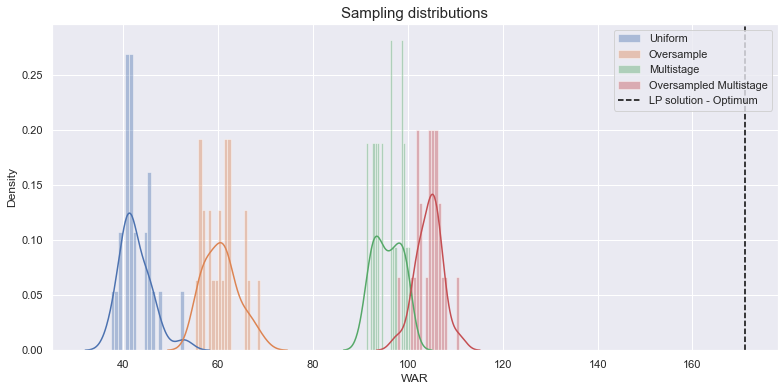

In [87]:
ground_truth = 171

# Plot the samples as histograms 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] = 'STIXGeneral'
sns.set()

fig, ax = plt.subplots(figsize=(13, 6))
for key in samples:
    sns.distplot(samples[key], label=key, bins=20)
# Plot ground truth as a vertical line
ax.axvline(ground_truth, color="black", linestyle="--", label = "LP solution - Optimum")
# legend with legend position
ax.legend()
# Add title
ax.set_title("Sampling distributions", size = 15)
# Add x-axis label
ax.set_xlabel("WAR")
# Add y-axis label
ax.set_ylabel("Density")
plt.show()